In [119]:
import numpy as np
import random
import gymnasium as gym
import gymnasium_env

## Environment - Taxi-v3

In [120]:
import time
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

# env = gym.make('Taxi-v3', render_mode='rgb_array')
env = gym.make('gymnasium_env/CenturyGolem-v0', render_mode='text')
state, _ = env.reset() # was state = env.reset()
done = False

for _ in range(20):
    # plt.imshow(env.render())
    # display.display(plt.gcf())    
    # display.clear_output(wait=True)
    # Pick random action
    action = env.action_space.sample()
    state, reward, done, _, __ = env.step(action)
env.close()

Crystals: 0 / 10, Card: available
Crystals: 2 / 10, Card: unavailable
The card is not available.
Crystals: 2 / 10, Card: unavailable
The card is not available.
Crystals: 2 / 10, Card: unavailable
The card is not available.
Crystals: 2 / 10, Card: unavailable
Crystals: 2 / 10, Card: available
Crystals: 2 / 10, Card: available
Crystals: 4 / 10, Card: unavailable
The card is not available.
Crystals: 4 / 10, Card: unavailable
Crystals: 4 / 10, Card: available
Crystals: 6 / 10, Card: unavailable
Crystals: 6 / 10, Card: available
Crystals: 8 / 10, Card: unavailable
The card is not available.
Crystals: 8 / 10, Card: unavailable
Crystals: 8 / 10, Card: available
Victory
Victory
Victory
The card is not available.
Victory
The card is not available.
Victory
Victory
Closing the Century Golem environment...


## Q-Learning Algorithm

### Initialize Q-Table

In [ ]:
# def initialize_Q_table(env):
#     """
#     For the given environment, the possible actions are integers from 0-5, 
#     and the possible states are integers from 0-499.
#     Therefore, the Q-Value of, for example, taking action 3 in state 156 can be found as Q[156, 3]
#     """
#     return np.zeros([env.observation_space.n, env.action_space.n])

In [ ]:
def initialize_Q_table(env):
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    return np.zeros((num_states, num_actions))

### Define epsilon-greedy policy

In [122]:
# Pick action following epsilon-greedy policy
def get_epsilon_greedy_action(Q, state):
    
    if np.random.uniform(0, 1) < epsilon: # epsilon defined in the cell below
        return env.action_space.sample()
    
    return np.argmax(Q[state])

### Define steps to follow by agent during an episode

In [ ]:
# def execute_episode(Q, max_timesteps):
    
#     # Initialize Rewards historic
#     rewards = list()
    
#     # Reset environment
#     state, _ = env.reset()
    
#     for _ in range(max_timesteps):
        
#         # Pick action following epsilon-greedy policy
#         action = get_epsilon_greedy_action(Q, state)
        
#         # Perform action and receive new state S' and reward R
#         new_state, reward, done, info, _ = env.step(action)
#         rewards.append(reward)
        
#         # Update Q-values 
#         old_value = Q[state, action]
#         next_max = np.max(Q[new_state])
#         new_value = (1 - step_size)*old_value + step_size*(reward + discount_factor * next_max) # step_size defined in the cell below
#         Q[state, action] = new_value
        
#         state = new_state

#         if done:
#             break
            
#     return Q, sum(rewards)
    

In [ ]:
def execute_episode(Q, n_steps, epsilon=0.1):
    state, _ = env.reset()
    total_reward = 0

    for _ in range(n_steps):
        # Epsilon-greedy policy
        if np.random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit

        # Take action in the environment
        next_state, reward, terminated, _, _ = env.step(action)

        # Update Q-table using Q-learning update rule
        best_next_action = np.argmax(Q[next_state])
        Q[state, action] = Q[state, action] + step_size * (
            reward + discount_factor * Q[next_state, best_next_action] - Q[state, action]
        )

        state = next_state
        total_reward += reward

        if terminated:
            break

    return Q, total_reward

### Train Agent

In [ ]:
# step_size = 0.7
# discount_factor = 0.8
# epsilon = 0.1
# n_episodes = 1500
# n_steps = 200

# # env = gym.make('Taxi-v3').env
# env = gym.make('gymnasium_env/CenturyGolem-v0', render_mode='text')
# rewards_history = list()

# def train_q_learning(epsilon):
    
#     Q = initialize_Q_table(env)

#     for episode in range(n_episodes):
#         print(f'Training on Episode {episode+1}... Epsilon: {epsilon}', end="\r")

#         Q, reward = execute_episode(Q, n_steps)
        
#         rewards_history.append(reward)
    
#     return Q, rewards_history
    

In [ ]:
step_size = 0.7
discount_factor = 0.8
epsilon = 0.1
n_episodes = 1500
n_steps = 200

# env = gym.make('Taxi-v3').env
env = gym.make('gymnasium_env/CenturyGolem-v0', render_mode='text')
rewards_history = []

def train_q_learning(env, epsilon):
    Q = initialize_Q_table(env)

    for episode in range(n_episodes):
        print(f"Training Episode {episode+1}/{n_episodes}... Epsilon: {epsilon}", end="\r")
        Q, reward = execute_episode(Q, n_steps, epsilon)
        rewards_history.append(reward)

    return Q, rewards_history

In [ ]:
# trained_Q, rewards_history = train_q_learning(epsilon)

In [ ]:
trained_Q, rewards_history = train_q_learning(env, epsilon)

### Evaluate Agent's performance

#### Rewards history

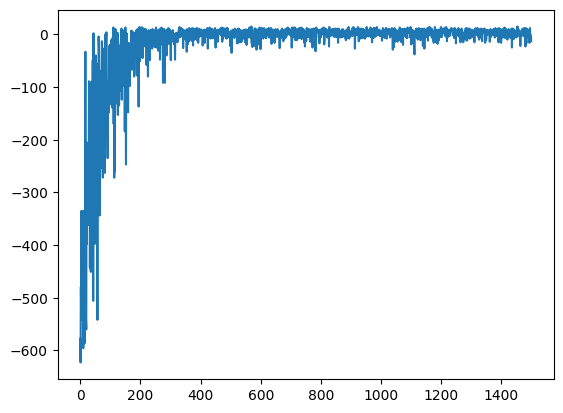

In [99]:
import matplotlib.pyplot as plt

plt.plot(range(n_episodes), rewards_history)
plt.show()

#### Visualization of the Trained Agent

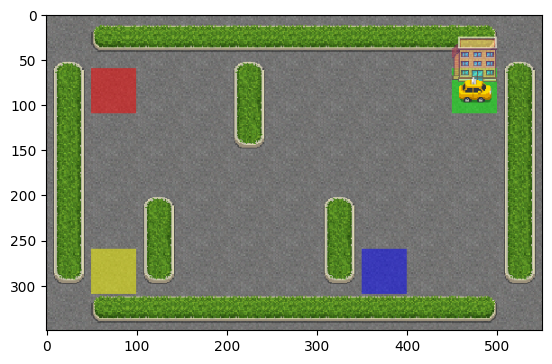

In [100]:
env = gym.make('Taxi-v3', render_mode='rgb_array')
# env = gym.make('gymnasium_env/CenturyGolem-v0', render_mode='text')
state, _ = env.reset()
done = False

while not done:
    plt.imshow(env.render())
    display.display(plt.gcf())    
    display.clear_output(wait=True)
    # Pick action following epsilon-greedy policy
    action = np.argmax(trained_Q[state])
    state, reward, done, _, __ = env.step(action)
env.close()

In [101]:
def execute_episodes_on_trained_agent(Q, n_episodes):
    
    episode_rewards = dict()
    for episode in range(n_episodes):
        print(f'Executing Episode {episode+1}...')
        
        # Initialize historics
        rewards = list()

        state, _ = env.reset()

        done = False
        n_steps = 0

        while not done:

            action = np.argmax(Q[state])

            state, reward, done, _, _ = env.step(action)
            rewards.append(reward)
            n_steps += 1
            
        episode_rewards[episode] = (sum(rewards), n_steps)
        print(f'Episode {episode+1} took {n_steps} steps, and got a reward of {sum(rewards)}\n')

    return episode_rewards

In [102]:
n_test_episodes = 10
trained_agent_rewards = execute_episodes_on_trained_agent(trained_Q, n_test_episodes)

avg_steps = sum([episode_info[1] for episode_info in trained_agent_rewards.values()])/n_test_episodes
avg_reward = sum([episode_info[0] for episode_info in trained_agent_rewards.values()])/n_test_episodes

print('\n\n')
print('Average number of timesteps per episode: ', avg_steps)
print('Average reward per episode: ', avg_reward)

Executing Episode 1...
Episode 1 took 12 steps, and got a reward of 9

Executing Episode 2...
Episode 2 took 10 steps, and got a reward of 11

Executing Episode 3...
Episode 3 took 9 steps, and got a reward of 12

Executing Episode 4...
Episode 4 took 17 steps, and got a reward of 4

Executing Episode 5...
Episode 5 took 11 steps, and got a reward of 10

Executing Episode 6...
Episode 6 took 16 steps, and got a reward of 5

Executing Episode 7...
Episode 7 took 14 steps, and got a reward of 7

Executing Episode 8...
Episode 8 took 17 steps, and got a reward of 4

Executing Episode 9...
Episode 9 took 13 steps, and got a reward of 8

Executing Episode 10...
Episode 10 took 16 steps, and got a reward of 5




Average number of timesteps per episode:  13.5
Average reward per episode:  7.5
